In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
corr = np.load('corrAutoencoderSparse.npy')

In [4]:
corr_hc = corr[0:52]
corr_schz = corr[52:]

In [5]:
corr_hc.shape

(52, 32)

In [6]:
corr_hc = corr_hc.reshape(52,32)

In [7]:
corr_schz = corr_schz.reshape(50,32)

In [8]:
X = np.append(corr_hc,corr_schz,axis=0)

In [9]:
X.shape

(102, 32)

In [10]:
X[0].shape

(32,)

In [11]:
Y = np.append(np.zeros(52),np.ones(50),axis=0)

In [12]:
Y.shape

(102,)

Now, we define the algorithms that we are going to use. 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [14]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [15]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [16]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [17]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.574048 (0.163320)
SVM: 0.509524 (0.134436)
KNN: 0.578512 (0.138968)
LR: 0.455714 (0.082027)
MLP: 0.474405 (0.041415)
RF: 0.541012 (0.153859)
ET: 0.577202 (0.122111)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938899, p:0.001984
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.314092, p:0.044074
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

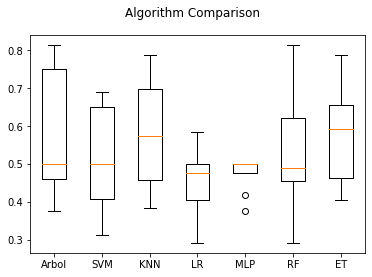

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.545000 (0.232624)
SVM: 0.408095 (0.328517)
KNN: 0.571905 (0.253595)
LR: 0.395130 (0.264439)
MLP: 0.167511 (0.205514)
RF: 0.516667 (0.234876)
ET: 0.589524 (0.261079)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.942537, p:0.003006
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.376444, p:0.891332
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

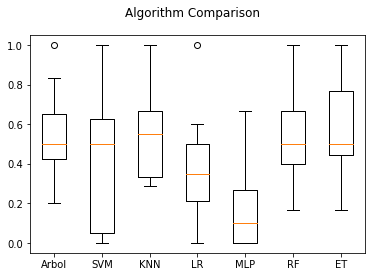

In [19]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.518452 (0.232896)
SVM: 0.360119 (0.321067)
KNN: 0.552381 (0.285526)
LR: 0.490476 (0.338472)
MLP: 0.320238 (0.395355)
RF: 0.506548 (0.214953)
ET: 0.504762 (0.243055)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.935698, p:0.001387
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.916602, p:0.489081
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

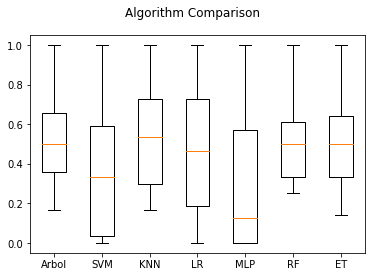

In [20]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.557273 (0.148494)
SVM: 0.488182 (0.190348)
KNN: 0.511818 (0.122174)
LR: 0.342727 (0.107876)
MLP: 0.352727 (0.098400)
RF: 0.509091 (0.126426)
ET: 0.517273 (0.134438)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.946846, p:0.004974
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.921489, p:0.485699
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

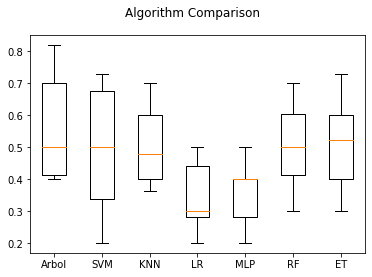

In [21]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')